In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data():
    import sys
    sys.path.append('..')
    from mnist_data import MnistData
    data = MnistData()
    train_X, train_y = data.read_train_set()
    test_X, test_y = data.read_test_set()
    return train_X, train_y, test_X, test_y
    

In [3]:
train_X, train_y, test_X, test_y = load_data()
train_X.shape, train_y.shape

reading 60000 items of size 28x28 from train-images-idx3-ubyte.gz
reading 60000 labels from train-labels-idx1-ubyte.gz
reading 10000 items of size 28x28 from t10k-images-idx3-ubyte.gz
reading 10000 labels from t10k-labels-idx1-ubyte.gz


((60000, 784), (60000,))

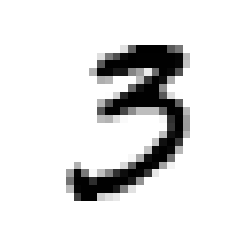

3


In [4]:
def display_image(img):
    plt.imshow(img.reshape(28,28), cmap = matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

digit_3 = train_X[15003]
display_image(digit_3)
print(train_y[15003])

In [5]:
shuffle_index = np.random.permutation(train_X.shape[0])
train_X, train_y = train_X[shuffle_index], train_y[shuffle_index]

## Training Binary Classifier

In [6]:
train_y_3 = train_y == 3
test_y_3 = test_y == 3

### SGD

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(train_X, train_y_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
sgd_clf.predict([digit_3])

array([ True])

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, train_X, train_y_3, cv=5, scoring='accuracy', n_jobs=1)

array([0.96591951, 0.95491667, 0.95833333, 0.94791667, 0.96333028])

In [10]:
cross_val_score(sgd_clf, train_X, train_y_3, cv=5, scoring='precision', n_jobs=-1)

array([0.82103611, 0.94888598, 0.95603015, 0.96879875, 0.94457014])

In [11]:
cross_val_score(sgd_clf, train_X, train_y_3, cv=5, scoring='recall', n_jobs=-1)

array([0.85248574, 0.59053834, 0.62071778, 0.50652529, 0.68107667])

In [12]:
from sklearn.model_selection import cross_val_predict

train_y_3_predicted = cross_val_predict(sgd_clf, train_X, train_y_3, cv=5,  n_jobs=-1)

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_3, train_y_3_predicted)

array([[53498,   371],
       [ 2144,  3987]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score, recall_score

print('precision', precision_score(train_y_3, train_y_3_predicted))
print('recall', recall_score(train_y_3, train_y_3_predicted))

precision 0.9148692060578247
recall 0.6503017452291633
